In [1]:
# load packages
library(purrr)        |> suppressPackageStartupMessages()
library(Rgraphviz)    |> suppressPackageStartupMessages()
library(bnlearn)      |> suppressPackageStartupMessages()
library(bnstruct)     |> suppressPackageStartupMessages()
library(Rgraphviz)    |> suppressPackageStartupMessages()
source('K2methods.r') |> suppressPackageStartupMessages()

Warning message:
"il pacchetto 'bnlearn' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'bnstruct' è stato creato con R versione 4.2.3"
Warning message:
"il pacchetto 'igraph' è stato creato con R versione 4.2.3"


In [2]:
data = asia()
data = impute(data)
data = imputed.data(data)

bnstruct :: performing imputation ...

bnstruct :: imputation finished.



In [3]:
mode(data) = 'character'
DF = data.frame(data, stringsAsFactors = TRUE)

colnames(DF) <- asia()@variables
head(DF)

,Asia,Tubercolosys,Smoke,LungCancer,Bronchitis,Either,X-ray,Dyspnea
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,2,1,1,1,2,1,2
2,2,1,1,1,1,1,2,1
3,1,1,2,1,1,1,2,1
4,2,1,2,1,1,1,2,1
5,2,1,2,1,1,1,1,2
6,2,1,2,1,1,1,2,2


In [4]:
today = 30062023 # default seed = 12345

In [5]:
struct = K2(n = ncol(DF), u = 3, D = DF, seed=today, num.iterations=5)

Running iteration # 1 ...The Network score is -22481.35 
  Running iteration # 2 ...The Network score is -22481.35 
  Running iteration # 3 ...The Network score is -22481.35 
  Running iteration # 4 ...The Network score is -22481.35 
  Running iteration # 5 ...The Network score is -22481.35 
   DONE 

Total execution time: 31.07913 mins


In [6]:
struct

$dag
$dag[[1]]
[1] NA

$dag[[2]]
[1] 1

$dag[[3]]
[1] 1

$dag[[4]]
[1] NA

$dag[[5]]
[1] 4

$dag[[6]]
[1] 2 5

$dag[[7]]
[1] 6

$dag[[8]]
[1] 3 6


$score
[1] -22481.35

$order
[1] "Asia"         "Tubercolosys" "Smoke"        "LungCancer"   "Bronchitis"  
[6] "Either"       "X-ray"        "Dyspnea"

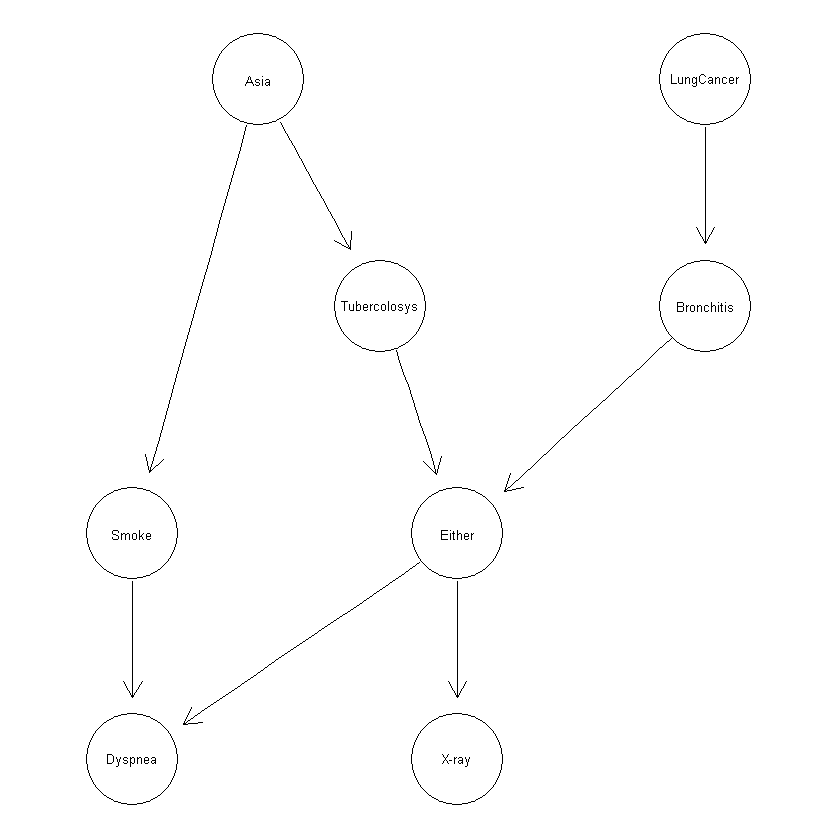

In [7]:
dag = get_dag(names(DF), struct$dag)
graphviz.plot(dag)

## `bnlearn` comparison

In [8]:
bn_bayes = bn.fit(dag, data = DF, method = 'bayes', iss = 10)
bn_bayes


  Bayesian network parameters

  Parameters of node Asia (multinomial distribution)

Conditional probability table:
         1         2 
0.4953047 0.5046953 

  Parameters of node Bronchitis (multinomial distribution)

Conditional probability table:
 
          LungCancer
Bronchitis          1          2
         1 0.98865127 0.91237113
         2 0.01134873 0.08762887

  Parameters of node Dyspnea (multinomial distribution)

Conditional probability table:
 
, , Smoke = 1

       Either
Dyspnea         1         2
      1 0.8956526 0.2996604
      2 0.1043474 0.7003396

, , Smoke = 2

       Either
Dyspnea         1         2
      1 0.2066524 0.0786736
      2 0.7933476 0.9213264


  Parameters of node Either (multinomial distribution)

Conditional probability table:
 
, , Tubercolosys = 1

      Bronchitis
Either           1           2
     1 0.999866002 0.010917031
     2 0.000133998 0.989082969

, , Tubercolosys = 2

      Bronchitis
Either           1           2
     1 0.00223

In [10]:
# recall that when we make this test H_0 = (x, y) are independent
ci.test(x = 'Asia', y = 'Tubercolosys', z = 'X-ray', data = DF, test = 'mi')

# this shows that since the p-value is low, by 
# taking a 5% significance level we can reject the null 
# hyp and say that x3 and x2 depend on each other


	Mutual Information (disc.)

data:  Asia ~ Tubercolosys | X-ray
mi = 313.65, df = 2, p-value < 2.2e-16
alternative hypothesis: true value is greater than 0


In [11]:
# this may say something about the structure we got through K2
ci.test(x = 'Dyspnea', y = 'Asia', z = 'Smoke', data = DF, test = 'mi')


	Mutual Information (disc.)

data:  Dyspnea ~ Asia | Smoke
mi = 20.932, df = 2, p-value = 2.848e-05
alternative hypothesis: true value is greater than 0


In [12]:
# evaluate the score of our network
score(dag, data = DF, type = 'bic')
score(dag, data = DF, type = 'bde')

[1] -22481.35

[1] -22466.4

### This is the very same result that we get too!!! :)

In [13]:
dataset <- asia()
net <- BN(dataset)

In [14]:
net


Bayesian Network: BNDataset

num.nodes 8

variables
Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2 2 2 2

In [15]:
net <- learn.network(dataset)

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



In [16]:
net


Bayesian Network: BNDataset

num.nodes 8

variables
Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2 2 2 2
Adjacency matrix:
             Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
Asia            0            1     1          0          0      0     0       0
Tubercolosys    0            0     0          0          0      1     0       0
Smoke           0            0     0          0          0      0     0       1
LungCancer      0            0     0          0          1      0     0       0
Bronchitis      0            0     0          0          0      1     0       0
Either          0            0     0          0          0      0     0       0
X-ray           0            0     0          0          0      0     0       1
Dyspnea         0            0     0          0          0      0     0       0

Conditional probability tables:$Asia
Asia
        1         2

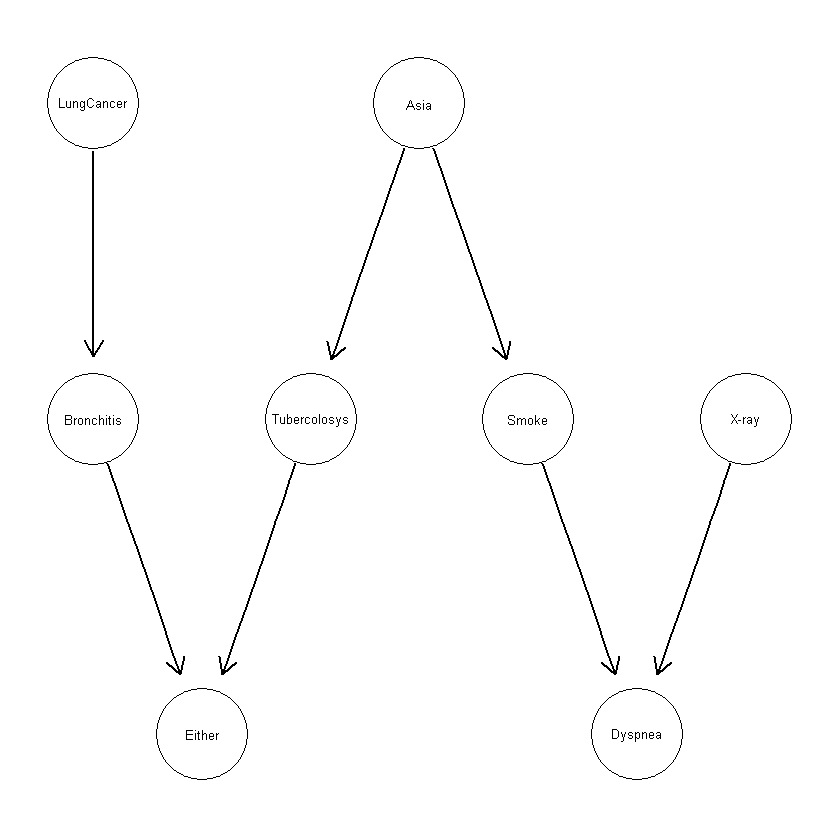

In [17]:
plot(net)